In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# EDA

### Missing Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [9]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [10]:
df.island.value_counts()

Biscoe       164
Dream        123
Torgersen     47
Name: island, dtype: int64

In [17]:
df = df[df.sex!='.']

### Visualization

<Figure size 1200x800 with 0 Axes>

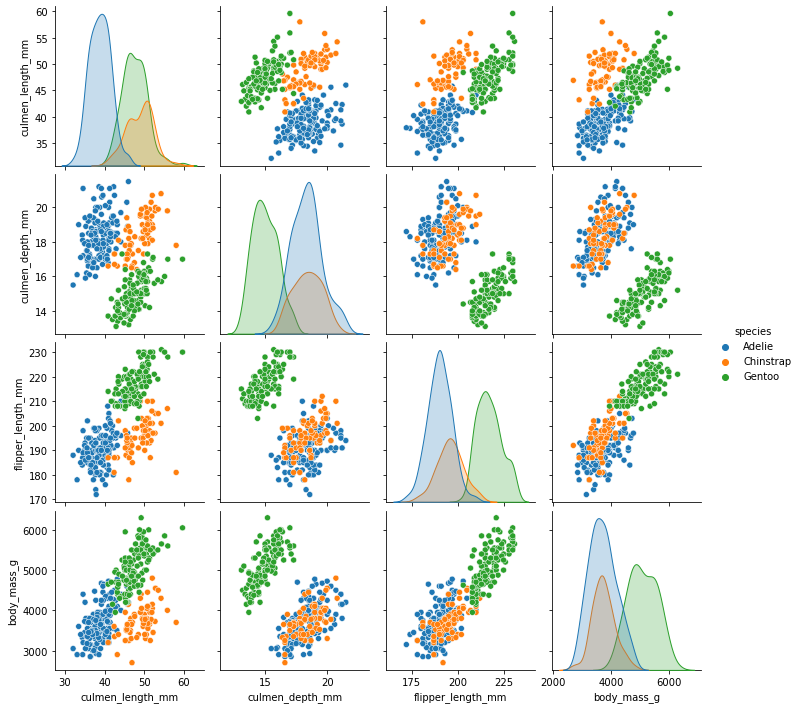

In [30]:
plt.figure(dpi=200);
sns.pairplot(data=df,hue='species');

<AxesSubplot:xlabel='species', ylabel='count'>

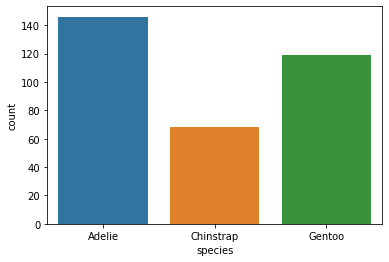

In [32]:
sns.countplot(x=df.species)

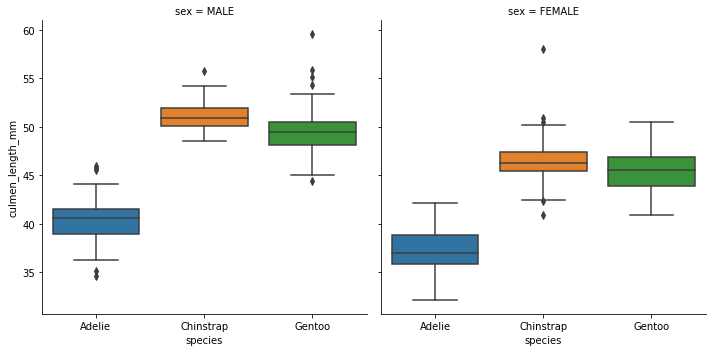

In [36]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex')

In [48]:
X=pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [49]:
from sklearn.model_selection import train_test_split


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Decision Tree Classifier

## Default Hyperparameters

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
model = DecisionTreeClassifier()

In [54]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
pred = model.predict(X_test)

### Evaluation

In [56]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [58]:
confusion_matrix(y_test,pred)

array([[38,  2,  0],
       [ 5, 22,  0],
       [ 1,  0, 32]], dtype=int64)

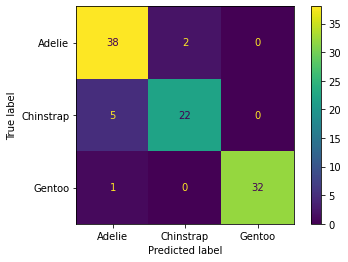

In [60]:
plot_confusion_matrix(model,X_test,y_test);

In [62]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Adelie       0.86      0.95      0.90        40
   Chinstrap       0.92      0.81      0.86        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100



In [63]:
model.feature_importances_

array([0.33350103, 0.02010577, 0.60833251, 0.        , 0.03806069,
       0.        , 0.        ])

In [65]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['feature'])

,feature
culmen_length_mm,0.333501
culmen_depth_mm,0.020106
flipper_length_mm,0.608333
body_mass_g,0.000000
island_Dream,0.038061
island_Torgersen,0.000000
sex_MALE,0.000000


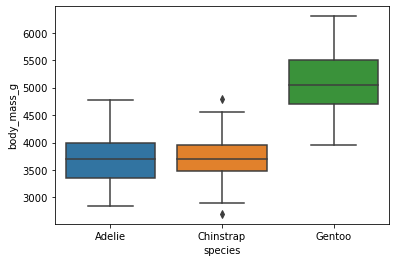

In [67]:
sns.boxplot(x='species',y='body_mass_g',data=df);

# Visualize The Tree

In [68]:
from sklearn.tree import plot_tree

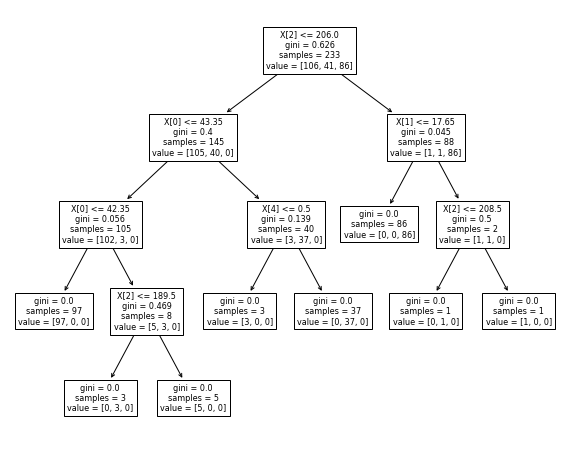

In [70]:
plt.figure(figsize=(10,8))
plot_tree(model);

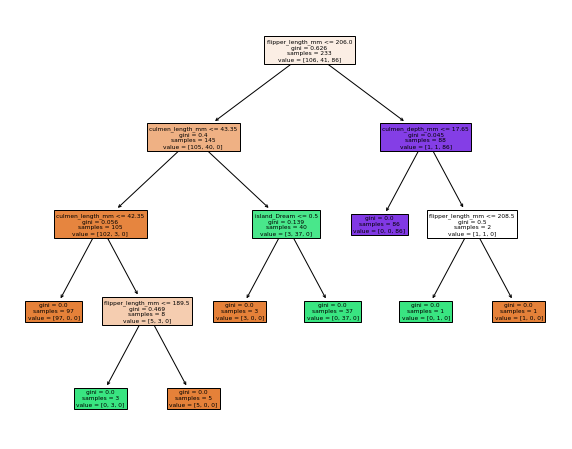

In [71]:
plt.figure(figsize=(10,8))
plot_tree(model,filled=True,feature_names=X.columns);

# Thanks 